In [ ]:
!sudo apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (16.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

## Cell A: Removing lines and imputing chars using fudamental algorithm

In [1]:
import os
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_image(image_path):
    """
    Load and preprocess the image by converting it to grayscale and inverting it.
    Args:
        image_path (str): The file path to the input image.
    Returns:
        numpy.ndarray: The preprocessed, inverted grayscale image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, inverted_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return inverted_image

def remove_non_character_objects(image):
    """
    Remove non-character objects from the image using contour detection.
    Args:
        image (numpy.ndarray): The input image with inverted colors.
    Returns:
        numpy.ndarray: The cleaned image with non-character objects removed.
    """
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(image.shape, dtype=np.uint8)

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if cv2.contourArea(contour) > 100:
            cv2.drawContours(mask, [contour], -1, 255, -1)

    cleaned_image = cv2.bitwise_and(image, image, mask=mask)
    return cleaned_image

def character_imputation(image):
    """
    Denoise the image and fill in gaps in characters using morphological operations.
    Args:
        image (numpy.ndarray): The input cleaned image with non-character objects removed.
    Returns:
        numpy.ndarray: The image with characters imputed.
    """
    kernel = np.ones((3, 3), np.uint8)
    cleaned_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=2)
    dilated_image = cv2.dilate(cleaned_image, kernel, iterations=1)
    return dilated_image

def perform_ocr(image):
    """
    Perform OCR on the image to extract text using Tesseract.
    Args:
        image (numpy.ndarray): The input image with characters imputed.
    Returns:
        str: The text extracted from the image.
    """
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    config = '--psm 6 -l fas+eng'  # Set the page segmentation mode and specify the languages
    text = pytesseract.image_to_string(rgb_image, config=config)
    return text

def process_images(input_dir, output_dir):
    """
    Process all images in the input directory and save results to the output directory.
    Args:
        input_dir (str): Directory containing input images.
        output_dir (str): Directory to save output images and OCR results.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(input_dir, filename)
            preprocessed_image = preprocess_image(image_path)
            cleaned_image = remove_non_character_objects(preprocessed_image)
            imputed_image = character_imputation(cleaned_image)
            ocr_text = perform_ocr(imputed_image)

            base_filename = os.path.splitext(filename)[0]
            preprocessed_output_path = os.path.join(output_dir, f"{base_filename}_preprocessed.png")
            cleaned_output_path = os.path.join(output_dir, f"{base_filename}_cleaned.png")
            imputed_output_path = os.path.join(output_dir, f"{base_filename}_imputed.png")
            ocr_output_path = os.path.join(output_dir, f"{base_filename}_ocr.txt")

            cv2.imwrite(preprocessed_output_path, preprocessed_image)
            cv2.imwrite(cleaned_output_path, cleaned_image)
            cv2.imwrite(imputed_output_path, imputed_image)

            with open(ocr_output_path, 'w') as ocr_file:
                ocr_file.write(ocr_text)

            print(f"Processed {filename}, OCR result saved to {ocr_output_path}")

input_dir = r"C:\Users\Hami\Desktop\in"
output_dir = r"C:\Users\Hami\Desktop\out"

process_images(input_dir, output_dir)


Processed 1.jpg, OCR result saved to C:\Users\Hami\Desktop\out\1_ocr.txt
Processed 2.jpg, OCR result saved to C:\Users\Hami\Desktop\out\2_ocr.txt
Processed 3.jpg, OCR result saved to C:\Users\Hami\Desktop\out\3_ocr.txt
Processed 5.jpg, OCR result saved to C:\Users\Hami\Desktop\out\5_ocr.txt
Processed 6.jpg, OCR result saved to C:\Users\Hami\Desktop\out\6_ocr.txt
Processed arq_0_(12).jpg, OCR result saved to C:\Users\Hami\Desktop\out\arq_0_(12)_ocr.txt
Processed bill-fa.jpg, OCR result saved to C:\Users\Hami\Desktop\out\bill-fa_ocr.txt
Processed Financial-account-circulation-letter-008.png, OCR result saved to C:\Users\Hami\Desktop\out\Financial-account-circulation-letter-008_ocr.txt
Processed poet-fa.jpeg, OCR result saved to C:\Users\Hami\Desktop\out\poet-fa_ocr.txt
Processed r6lsk2.jpeg, OCR result saved to C:\Users\Hami\Desktop\out\r6lsk2_ocr.txt
Processed restaurant-bill-2.jpg, OCR result saved to C:\Users\Hami\Desktop\out\restaurant-bill-2_ocr.txt
Processed restaurant-bill.jpg, OC

In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='path/to/your/yolov5s.pt')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 202.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 197.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 10.3s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-7-11 Python-3.10.12 torch-2.3.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 132MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## line removing using contour dwaing and analysis

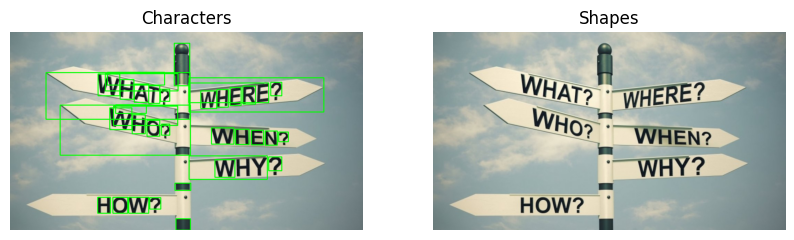

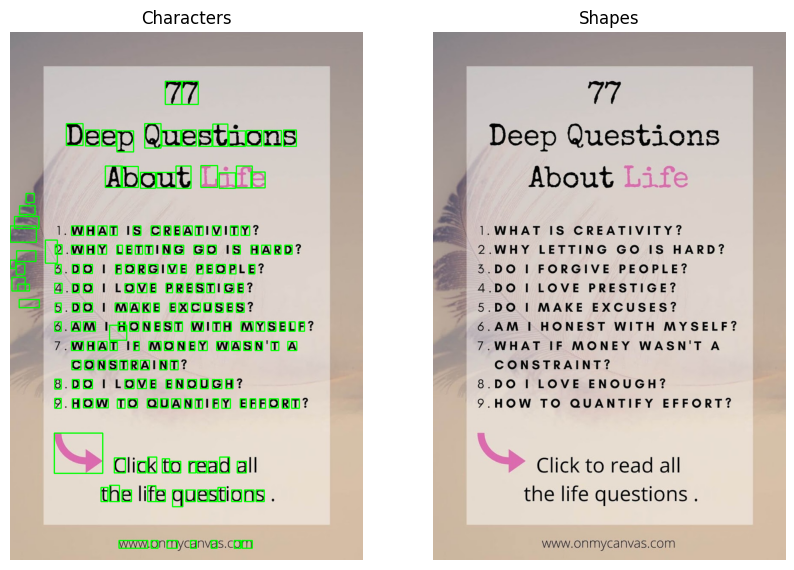

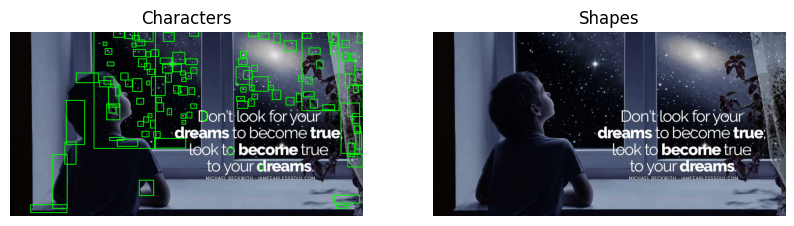

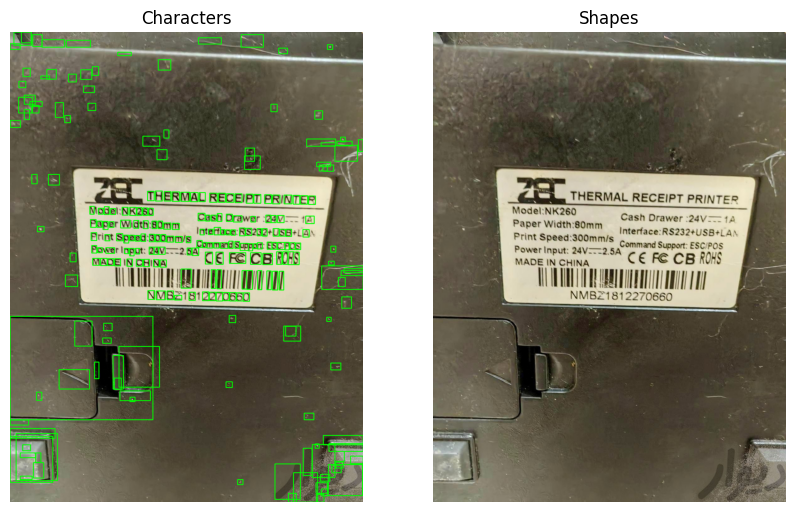

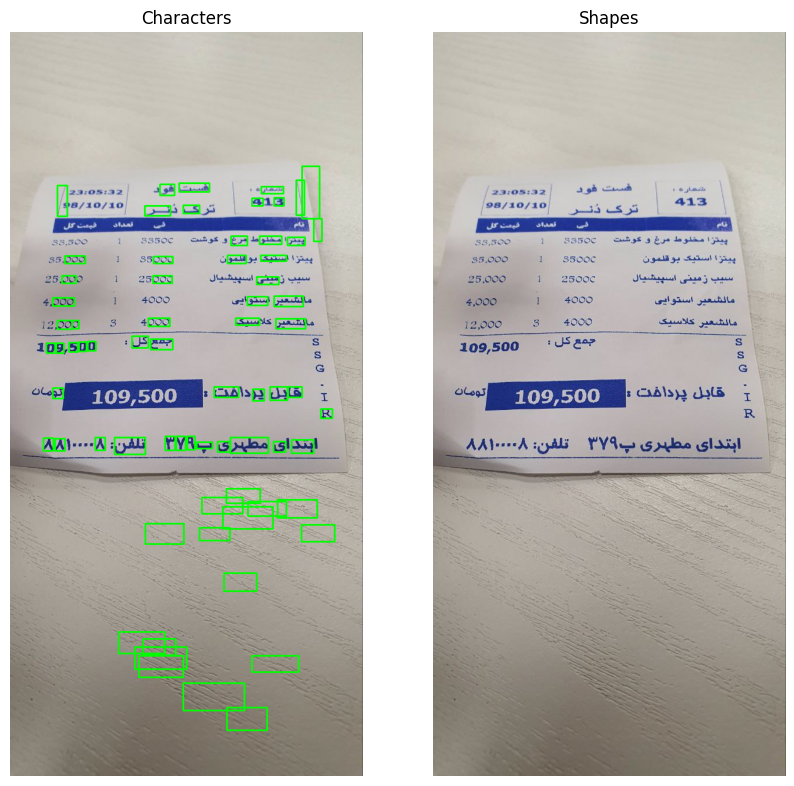

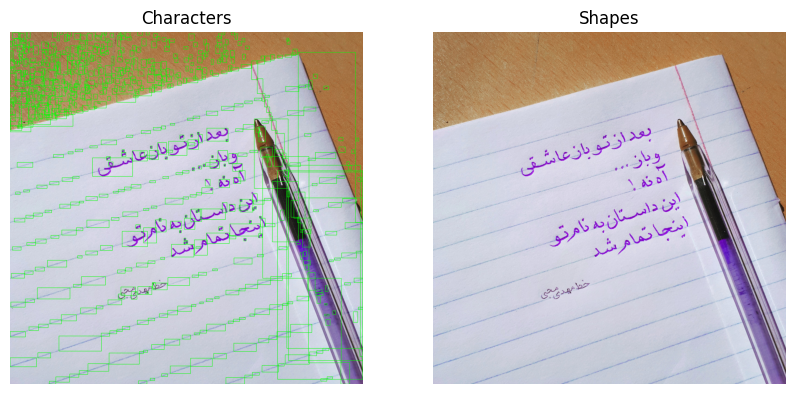

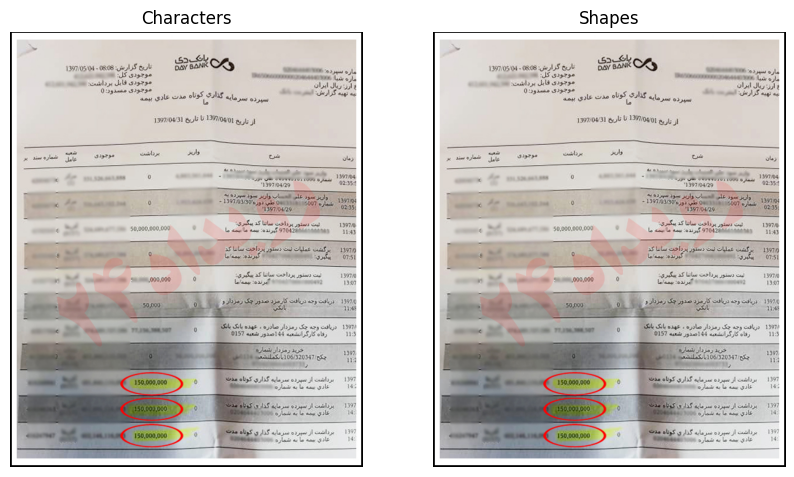

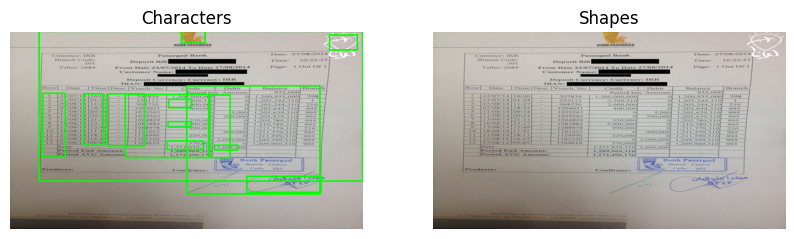

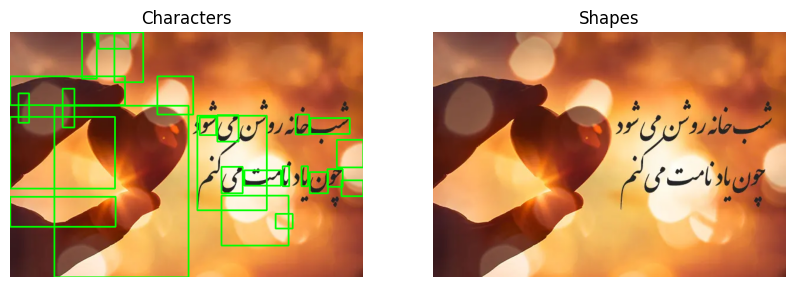

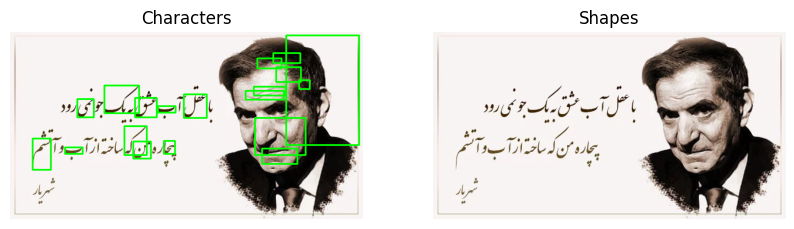

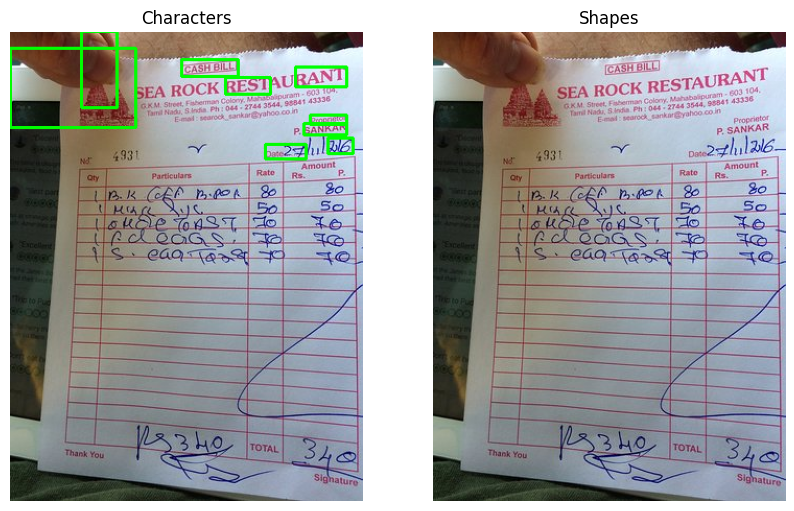

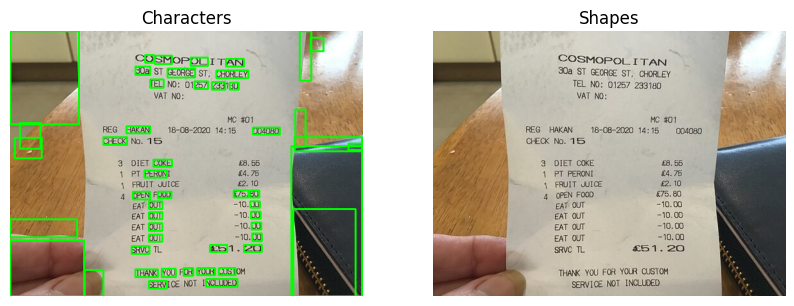

In [7]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure Tesseract is installed and properly configured
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


def preprocess_image(image_path):
    """
    Load and preprocess the image by converting it to grayscale, applying Gaussian blur, and adaptive thresholding.
    Args:
        image_path (str): The file path to the input image.
    Returns:
        numpy.ndarray: The preprocessed image after adaptive thresholding.
    """
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Adaptive Thresholding
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)
    return thresholded

def detect_contours(image):
    """
    Detect contours in the preprocessed image.
    Args:
        image (numpy.ndarray): The preprocessed image.
    Returns:
        list: A list of detected contours.
    """
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def filter_character_contours(contours):
    """
    Filter contours to retain only those that likely correspond to characters based on area and aspect ratio.
    Args:
        contours (list): A list of detected contours.
    Returns:
        list: A list of filtered character contours.
    """
    character_contours = []

    for cnt in contours:
        # Calculate contour area
        area = cv2.contourArea(cnt)

        # Calculate bounding box
        x, y, w, h = cv2.boundingRect(cnt)

        # Calculate aspect ratio
        aspect_ratio = w / float(h)

        # Filter based on area and aspect ratio
        if 100 < area < 10000 and 0.2 < aspect_ratio < 5.0:
            character_contours.append(cnt)

    return character_contours

def filter_shape_contours(contours, character_boxes):
    """
    Filter contours to retain those that likely correspond to shapes, excluding those inside or close to character bounding boxes.
    Args:
        contours (list): A list of detected contours.
        character_boxes (list): A list of bounding boxes of detected character contours.
    Returns:
        list: A list of filtered shape contours.
    """
    shape_contours = []

    for cnt in contours:
        # Calculate bounding box
        x, y, w, h = cv2.boundingRect(cnt)

        # Check if the shape is inside or very close to any character bounding box
        inside_character_box = False
        for char_box in character_boxes:
            cx, cy, cw, ch = char_box
            if (x >= cx and y >= cy and x+w <= cx+cw and y+h <= cy+ch) or (
                abs(cx - x) < 10 or abs(cy - y) < 10 or abs((cx+cw) - (x+w)) < 10 or abs((cy+ch) - (y+h)) < 10):
                inside_character_box = True
                break

        # Filter based on additional shape properties (e.g., aspect ratio, area)
        if not inside_character_box:
            area = cv2.contourArea(cnt)
            aspect_ratio = w / float(h)
            extent = area / (w * h)  # Ratio of contour area to bounding box area

            # Exclude contours that are likely in blank areas
            if 200 < area < 5000 and 0.5 < aspect_ratio < 2.0 and 0.2 < extent < 0.8:
                shape_contours.append(cnt)

    return shape_contours

def draw_contours(image, contours, color):
    """
    Draw bounding rectangles around contours on the image.
    Args:
        image (numpy.ndarray): The input image on which contours will be drawn.
        contours (list): A list of contours to be drawn.
        color (tuple): The color of the bounding rectangles in BGR format.
    Returns:
        numpy.ndarray: The image with drawn bounding rectangles around the contours.
    """
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    return image

def perform_ocr(image):
    """
    Perform OCR on the image to extract text using Tesseract.
    Args:
        image (numpy.ndarray): The input image with characters imputed.
    Returns:
        str: The text extracted from the image.
    """
    # Convert image to RGB (required for pytesseract)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Perform OCR using Tesseract with configurations for both Persian and English
    config = '--psm 6 -l fas+eng'  # Set the page segmentation mode and languages
    text = pytesseract.image_to_string(rgb_image, config=config)

    return text

def process_images(input_folder, output_folder):
    """
    Process all images in the input folder, detecting characters and shapes, and saving results to the output folder.
    Args:
        input_folder (str): Path to the input folder containing images.
        output_folder (str): Path to the output folder to save processed images and OCR results.
    """
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            image_path = os.path.join(input_folder, filename)
            characters_output_path = os.path.join(output_folder, 'characters_' + filename)
            shapes_output_path = os.path.join(output_folder, 'shapes_' + filename)
            ocr_output_path = os.path.join(output_folder, 'ocr_' + os.path.splitext(filename)[0] + '.txt')

            # Preprocess the image
            preprocessed_image = preprocess_image(image_path)

            # Detect contours
            contours = detect_contours(preprocessed_image)

            # Filter character contours
            character_contours = filter_character_contours(contours)
            character_boxes = [cv2.boundingRect(cnt) for cnt in character_contours]

            # Filter shape contours
            shape_contours = filter_shape_contours(contours, character_boxes)

            # Draw contours
            original_image = cv2.imread(image_path)
            characters_image = draw_contours(original_image.copy(), character_contours, (0, 255, 0))
            shapes_image = draw_contours(original_image.copy(), shape_contours, (0, 0, 255))

            # Perform OCR
            ocr_text = perform_ocr(preprocessed_image)

            # Save results
            cv2.imwrite(characters_output_path, characters_image)
            cv2.imwrite(shapes_output_path, shapes_image)
            with open(ocr_output_path, 'w', encoding='utf-8') as f:
                f.write(ocr_text)

            # Optionally display images
            plt.figure(figsize=(10, 10))
            plt.subplot(1, 2, 1)
            plt.title('Characters')
            plt.imshow(cv2.cvtColor(characters_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title('Shapes')
            plt.imshow(cv2.cvtColor(shapes_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.show()

# Paths to input and output folders
input_folder = r'C:\Users\Hami\Desktop\in'
output_folder = r'C:\Users\Hami\Desktop\out6'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
process_images(input_folder, output_folder)



## line removing using morphological operation

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to read and preprocess the image
def preprocess_image(image_path):
    # Read image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return gray_image

# Function to apply adaptive thresholding
def adaptive_threshold(image):
    # Apply adaptive thresholding
    thresh_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)
    return thresh_image

# Function to estimate font size in the image
def estimate_font_size(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    heights = [cv2.boundingRect(contour)[3] for contour in contours]
    average_height = np.mean(heights) if heights else 20  # Default to 20 if no contours found
    return average_height

# Function to apply morphological operations based on font size
def morphological_operations(image, font_size):
    # Structuring elements relative to font size
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (int(font_size/2), int(font_size/2)))
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (int(font_size/4), int(font_size/4)))

    # Apply morphological closing
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_close)

    # Apply morphological opening
    opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel_open)

    return opened_image

# Function to apply non-local means denoising
def reduce_noise(image):
    # Use Non-local Means Denoising
    denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
    return denoised_image

# Function to perform post-processing
def post_processing(image, font_size):
    # Apply Gaussian blur to smoothen the image
    blurred_image = cv2.GaussianBlur(image, (int(font_size/2), int(font_size/2)), 0)

    return blurred_image

# Function to denoise image before OCR
def denoise_image_for_ocr(image_path):
    # Preprocess the image
    gray_image = preprocess_image(image_path)

    # Apply adaptive thresholding
    thresh_image = adaptive_threshold(gray_image)

    # Estimate font size
    font_size = estimate_font_size(thresh_image)

    # Apply morphological operations
    morph_image = morphological_operations(thresh_image, font_size)

    # Reduce noise
    noise_reduced_image = reduce_noise(morph_image)

    # Perform post-processing
    final_image = post_processing(noise_reduced_image, font_size)

    return final_image

# Path to the input image
input_image_path = '/content/X00016469612.jpg'

# Denoise the image
denoised_image = denoise_image_for_ocr(input_image_path)

# Save and display the processed image
output_path = '/content/denoised_image.png'
cv2.imwrite(output_path, denoised_image)

# Display the denoised image
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')
plt.show()

print("Denoising completed. Denoised image saved at:", output_path)


Denoising completed. Denoised image saved at: /content/denoised_image.png


In [ ]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/restaurant-bill-3.webp'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize image using Otsu's thresholding
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define structuring elements
cross_kernel = np.array([[0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0],
                         [1, 1, 1, 1, 1],
                         [0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0]], dtype=np.uint8)

square_kernel = np.ones((3, 3), dtype=np.uint8)

# Apply morphological closing
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, cross_kernel)

# Apply morphological erosion
eroded = cv2.erode(closed, square_kernel, iterations=1)

# Further remove noise
denoised = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, square_kernel)

# Display the preprocessed image
plt.figure(figsize=(10, 10))
plt.imshow(denoised, cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Apply OCR
config = '--psm 6'
text = pytesseract.image_to_string(denoised, config=config)

# Save the preprocessed image
preprocessed_image_path = '/content/preprocessed_image.png'
cv2.imwrite(preprocessed_image_path, denoised)

# Save the OCR output
ocr_output_path = '/content/ocr_output.txt'
with open(ocr_output_path, 'w') as f:
    f.write(text)

preprocessed_image_path, ocr_output_path


('/content/preprocessed_image.png', '/content/ocr_output.txt')

## UNet deep model for background denoising (removal)

In [1]:
!wget https://archive.ics.uci.edu/static/public/318/noisyoffice.zip

--2024-07-11 13:52:09--  https://archive.ics.uci.edu/static/public/318/noisyoffice.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘noisyoffice.zip’

noisyoffice.zip         [             <=>    ] 425.95M   107MB/s    in 4.4s    

2024-07-11 13:52:14 (97.3 MB/s) - ‘noisyoffice.zip’ saved [446643512]



In [2]:
!unzip /content/noisyoffice.zip

Archive:  /content/noisyoffice.zip
   creating: NoisyOffice/
  inflating: NoisyOffice/NoisyOffice_icon.png  
   creating: NoisyOffice/SimulatedNoisyOffice/
   creating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/Fontnrm_Clean_VA.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/FontLre_Clean_TE.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/Fontfre_Clean_TR.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/Fontnte_Clean_TE.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/FontLse_Clean_TR.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/Fontnse_Clean_TE.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/Fontfsm_Clean_TE.png  
  inflating: NoisyOffice/SimulatedNoisyOffice/clean_images_binaryscale/FontLre_Clean_TR.png  
  inflating: NoisyOf

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
from glob import glob

# Paths to the directories
clean_images_path = '/content/NoisyOffice/SimulatedNoisyOffice/clean_images_grayscale/'
noisy_images_path = '/content/NoisyOffice/SimulatedNoisyOffice/simulated_noisy_images_grayscale/'

# Fixed image size
IMAGE_HEIGHT, IMAGE_WIDTH = 256, 256

# Load and resize images
def load_and_resize_images_from_folder(folder, image_height=IMAGE_HEIGHT, image_width=IMAGE_WIDTH):
    images = []
    for filename in glob(folder + '*.png'):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (image_width, image_height))
            images.append(img)
    return images

clean_images = load_and_resize_images_from_folder(clean_images_path)
noisy_images = load_and_resize_images_from_folder(noisy_images_path)

# Convert to numpy arrays and normalize
clean_images = np.array(clean_images) / 255.0
noisy_images = np.array(noisy_images) / 255.0

# Expand dimensions to match the input shape required by the model
clean_images = np.expand_dims(clean_images, axis=-1)
noisy_images = np.expand_dims(noisy_images, axis=-1)

print("Clean images shape:", clean_images.shape)
print("Noisy images shape:", noisy_images.shape)


Clean images shape: (54, 256, 256, 1)
Noisy images shape: (216, 256, 256, 1)


Clean images shape: (54, 256, 256, 1)
Noisy images shape: (54, 256, 256, 1)
Training set size: 43
Validation set size: 11
Epoch 1/50
6/6 [==============================] - 10s 378ms/step - loss: 0.2334 - accuracy: 0.1911 - val_loss: 0.1782 - val_accuracy: 0.0480
Epoch 2/50
6/6 [==============================] - 2s 305ms/step - loss: 0.2151 - accuracy: 0.1878 - val_loss: 0.1898 - val_accuracy: 0.1969
Epoch 3/50
6/6 [==============================] - 2s 297ms/step - loss: 0.1985 - accuracy: 0.1859 - val_loss: 0.1586 - val_accuracy: 0.0167
Epoch 4/50
6/6 [==============================] - 2s 295ms/step - loss: 0.1776 - accuracy: 0.1845 - val_loss: 0.1306 - val_accuracy: 0.0076
Epoch 5/50
6/6 [==============================] - 2s 299ms/step - loss: 0.1456 - accuracy: 0.1811 - val_loss: 0.2679 - val_accuracy: 0.0846
Epoch 6/50
6/6 [==============================] - 2s 297ms/step - loss: 0.1001 - accuracy: 0.1772 - val_loss: 0.8223 - val_accuracy: 0.0990
Epoch 7/50
6/6 [=====================

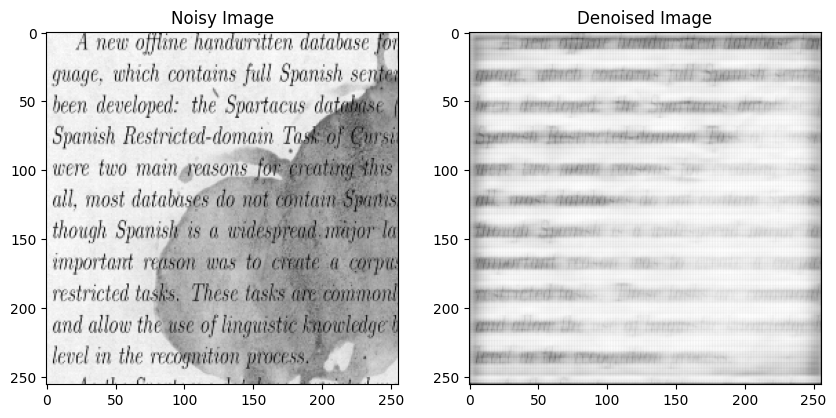

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
from glob import glob


# Load and resize images
clean_images_path = '/content/NoisyOffice/SimulatedNoisyOffice/clean_images_grayscale/'
noisy_images_path = '/content/NoisyOffice/SimulatedNoisyOffice/simulated_noisy_images_grayscale/'

# Fixed image size
IMAGE_HEIGHT, IMAGE_WIDTH = 256, 256

# Load and resize images
def load_and_resize_images(clean_folder, noisy_folder, image_height=IMAGE_HEIGHT, image_width=IMAGE_WIDTH):
    clean_images = []
    noisy_images = []

    clean_filenames = sorted(glob(clean_folder + '*.png'))
    noisy_filenames = sorted(glob(noisy_folder + '*.png'))

    for clean_file, noisy_file in zip(clean_filenames, noisy_filenames):
        clean_img = cv2.imread(clean_file, cv2.IMREAD_GRAYSCALE)
        noisy_img = cv2.imread(noisy_file, cv2.IMREAD_GRAYSCALE)

        if clean_img is not None and noisy_img is not None:
            clean_img = cv2.resize(clean_img, (image_width, image_height))
            noisy_img = cv2.resize(noisy_img, (image_width, image_height))

            clean_images.append(clean_img)
            noisy_images.append(noisy_img)

    return clean_images, noisy_images

clean_images, noisy_images = load_and_resize_images(clean_images_path, noisy_images_path)

# Convert to numpy arrays and normalize
clean_images = np.array(clean_images) / 255.0
noisy_images = np.array(noisy_images) / 255.0

# Expand dimensions to match the input shape required by the model
clean_images = np.expand_dims(clean_images, axis=-1)
noisy_images = np.expand_dims(noisy_images, axis=-1)

print("Clean images shape:", clean_images.shape)
print("Noisy images shape:", noisy_images.shape)

# Ensure that both datasets have the same number of samples
num_samples = min(len(clean_images), len(noisy_images))
clean_images = clean_images[:num_samples]
noisy_images = noisy_images[:num_samples]

import keras.layers as layers
import keras.models as models
from keras.initializers import orthogonal
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                      kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def AutoEncdoer(input_shape):
    inputs = layers.Input(shape=input_shape)
    # 256 x 256
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    # 128 x 128
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    # 64 x 64
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    # 32 x 32
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    # 16 x 16
    deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)

    # 32 x 32
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)

    # 64 x 64
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    # 128 x 128
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    # 256 x 256
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',
                       kernel_initializer=orthogonal(), name='final_conv')(skip3)

    return models.Model(inputs=inputs, outputs=conv10)

input_shape = (256, 256, 1)
model = AutoEncdoer(input_shape)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,verbose=1,patience=5,min_delta=0.00001),
     tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_auto_model.h5', monitor='acc', save_best_only=True)
]


# Split the data into training and validation sets
train_size = int(0.8 * num_samples)
x_train, x_val = noisy_images[:train_size], noisy_images[train_size:]
y_train, y_val = clean_images[:train_size], clean_images[train_size:]

print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_val, y_val))

# Evaluate the model
loss = model.evaluate(x_val, y_val)
print(f'Validation loss: {loss}')

# Denoise a new image
def denoise_image(noisy_image):
    noisy_image = np.expand_dims(noisy_image, axis=0)  # Add batch dimension
    denoised_image = model.predict(noisy_image)
    return denoised_image[0, :, :, 0]

# Example usage
noisy_example = noisy_images[0]
denoised_example = denoise_image(noisy_example)

# Show the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_example[:, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_example, cmap='gray')
plt.show()


In [14]:
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_val, y_val))


Epoch 1/20
3/3 [==============================] - 2s 541ms/step - loss: 0.0456 - accuracy: 0.2008 - val_loss: 0.0633 - val_accuracy: 0.1052
Epoch 2/20
3/3 [==============================] - 2s 522ms/step - loss: 0.0454 - accuracy: 0.2006 - val_loss: 0.0625 - val_accuracy: 0.1145
Epoch 3/20
3/3 [==============================] - 2s 545ms/step - loss: 0.0464 - accuracy: 0.2004 - val_loss: 0.0620 - val_accuracy: 0.1149
Epoch 4/20
3/3 [==============================] - 2s 553ms/step - loss: 0.0453 - accuracy: 0.2033 - val_loss: 0.0629 - val_accuracy: 0.1199
Epoch 5/20
3/3 [==============================] - 2s 532ms/step - loss: 0.0456 - accuracy: 0.2033 - val_loss: 0.0626 - val_accuracy: 0.1095
Epoch 6/20
3/3 [==============================] - 2s 528ms/step - loss: 0.0454 - accuracy: 0.2009 - val_loss: 0.0616 - val_accuracy: 0.1500
Epoch 7/20
3/3 [==============================] - 2s 525ms/step - loss: 0.0459 - accuracy: 0.2010 - val_loss: 0.0624 - val_accuracy: 0.1339
Epoch 8/20
3/3 [====

1/1 [==============================] - 0s 18ms/step


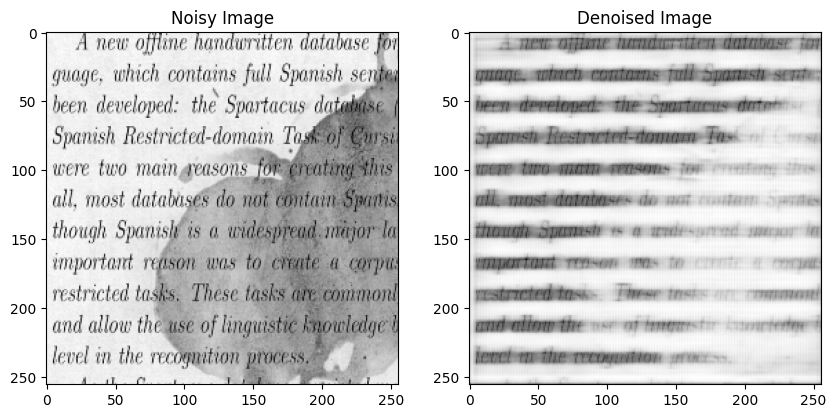

In [15]:
def denoise_image(noisy_image):
    noisy_image = np.expand_dims(noisy_image, axis=0)  # Add batch dimension
    denoised_image = model.predict(noisy_image)
    return denoised_image[0, :, :, 0]

# Example usage
noisy_example = noisy_images[0]
denoised_example = denoise_image(noisy_example)

# Show the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_example[:, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_example, cmap='gray')
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import applications, optimizers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
new_shape = (256, 256, 1)

model= Sequential()
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv1', input_shape= new_shape))
model.add(BatchNormalization(name= 'BN1'))
model.add(MaxPool2D((2,2), padding='same', name='pool1'))

#Decoder
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu', padding='same', name='Conv2'))
model.add(UpSampling2D((2,2), name='upsample1'))
model.add(Conv2D(filters= 1, kernel_size= (3,3), activation='sigmoid', padding='same', name='Conv3'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics= ['RootMeanSquaredError'])

model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_per_epoch,
                    validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 3s 573ms/step - loss: 0.0834 - root_mean_squared_error: 0.2887 - val_loss: 0.0749 - val_root_mean_squared_error: 0.2738
Epoch 2/50
5/5 [==============================] - 0s 79ms/step - loss: 0.0454 - root_mean_squared_error: 0.2130 - val_loss: 0.0638 - val_root_mean_squared_error: 0.2525
Epoch 3/50
5/5 [==============================] - 1s 124ms/step - loss: 0.0451 - root_mean_squared_error: 0.2123 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2529
Epoch 4/50
5/5 [==============================] - 1s 172ms/step - loss: 0.0445 - root_mean_squared_error: 0.2109 - val_loss: 0.0644 - val_root_mean_squared_error: 0.2539
Epoch 5/50
5/5 [==============================] - 1s 143ms/step - loss: 0.0458 - root_mean_squared_error: 0.2141 - val_loss: 0.0643 - val_root_mean_squared_error: 0.2535
Epoch 6/50
5/5 [==============================] - 1s 130ms/step - loss: 0.0421 - root_mean_squared_error: 0.2052 - val_loss: 0.0639 - val_root_mean_squ

In [25]:
model.fit(train_gen, epochs=epochs, steps_per_epoch=steps_per_epoch,
                    validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 1s 113ms/step - loss: 0.0322 - root_mean_squared_error: 0.1795 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2555
Epoch 2/50
5/5 [==============================] - 0s 106ms/step - loss: 0.0330 - root_mean_squared_error: 0.1817 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2539
Epoch 3/50
5/5 [==============================] - 0s 102ms/step - loss: 0.0326 - root_mean_squared_error: 0.1806 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2552
Epoch 4/50
5/5 [==============================] - 0s 92ms/step - loss: 0.0336 - root_mean_squared_error: 0.1834 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2568
Epoch 5/50
5/5 [==============================] - 0s 87ms/step - loss: 0.0348 - root_mean_squared_error: 0.1866 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2555
Epoch 6/50
5/5 [==============================] - 0s 97ms/step - loss: 0.0321 - root_mean_squared_error: 0.1790 - val_loss: 0.0654 - val_root_mean_squar

1/1 [==============================] - 0s 51ms/step - loss: 0.0671 - root_mean_squared_error: 0.2591
Validation loss: [0.06711357086896896, 0.25906285643577576]
1/1 [==============================] - 0s 19ms/step


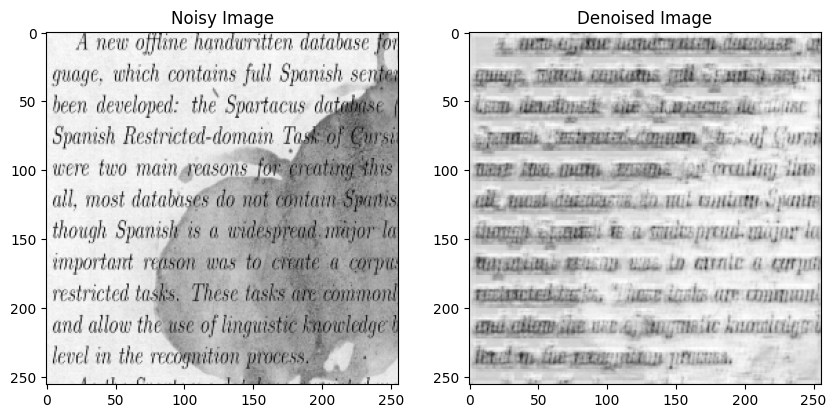

In [26]:
# Evaluate the model
loss = model.evaluate(x_val, y_val)
print(f'Validation loss: {loss}')

# Denoise a new image
def denoise_image(noisy_image):
    noisy_image = np.expand_dims(noisy_image, axis=0)  # Add batch dimension
    denoised_image = model.predict(noisy_image)
    return denoised_image[0, :, :, 0]

# Example usage
noisy_example = noisy_images[0]
denoised_example = denoise_image(noisy_example)

# Show the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_example[:, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_example, cmap='gray')
plt.show()